In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***this is important***

In [ ]:
pip install transformers==4.45.2 sentence-transformers==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207

In [ ]:
import pandas as pd

data = []
with open('/content/drive/My Drive/COSYWEE/Dataset/ocr_results.txt', 'r') as file:
    for line in file:
        # Use split with maxsplit=1 to only split at the first occurrence of a space
        file_name, text = line.rstrip('\n').split(' ', 1)
        data.append({'file name': file_name, 'text': text})

df = pd.DataFrame(data)
print(df.head(40))


                                   file name  \
0                     line2_qte_fd6a2a32.png   
1                  line1_repere_d78cc0da.png   
2                  line0_repere_40e3b3a8.png   
3                     line1_qte_bea32bba.png   
4                  ref_chantier_0debbd85.png   
5                     line0_qte_eaf2898e.png   
6                          date_a0c2c151.png   
7                  line2_repere_ac204146.png   
8                 line2_largeur_0e2ad6ae.png   
9                 line2_hauteur_61c5abf5.png   
10                line3_hauteur_5b3a72f0.png   
11                   line5_type_1c0db408.png   
12                    line2_qte_beb38a09.png   
13                   line2_type_61163188.png   
14                line4_largeur_69b7d367.png   
15                line0_hauteur_d7626d26.png   
16                    line3_qte_2574962d.png   
17                line0_largeur_bed51283.png   
18                    line1_qte_eb24b43f.png   
19                   line1_type_c3e11058

In [ ]:
#Applying lambda to find the extension that end with jp, if it ends with jp change it to jpg
df['file name'] = df['file name'].apply(lambda x: x + 'g' if x.endswith('jp') else x)

In [ ]:
df.head(10)

,file name,text
0,line2_qte_fd6a2a32.png,1
1,line1_repere_d78cc0da.png,ch guillaume
2,line0_repere_40e3b3a8.png,Chambr
3,line1_qte_bea32bba.png,1
4,ref_chantier_0debbd85.png,VEYRY
5,line0_qte_eaf2898e.png,1
6,date_a0c2c151.png,03 /05/24
7,line2_repere_ac204146.png,SDJ
8,line2_largeur_0e2ad6ae.png,1190
9,line2_hauteur_61c5abf5.png,1105


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)

In [ ]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df
test_df

,file name,text
0,line0_largeur_4a90749a.png,1189
1,line0_manoeuvre_type_tige_et_cordon_3645167f.png,X
2,line4_qte_5f9cf5c1.png,1
3,line0_couleur_et_dimensions_qte_f278d209.png,1
4,line1_hauteur_ef5dd3bd.png,1510
...,...,...
483,ref_chantier_616baa30.png,DESRAYAUX
484,line0_qte_3a8d0c7c.png,1
485,adress_liv1_3bfdb165.png,10 Route de Macon
486,raison_sociale_38b52ac9.png,METALLERiE DU SORNIN


In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class IAMDataset(Dataset):
  def __init__(self, df, root_dir, processor, max_target_length=128):
    self.df = df
    self.root_dir = root_dir
    self.processor = processor
    self.max_target_length = max_target_length
  def __len__(self):
    return len(self.df)
  def __getitem__(self, idx):
    file_name = self.df['file name'][idx]
    text = self.df['text'][idx]
    image = Image.open(self.root_dir + file_name).convert('RGB')
    pixel_values = self.processor(image, return_tensors='pt').pixel_values
    #tokenize the text into input_id
    labels = self.processor.tokenizer(text, padding='max_length', max_length= self.max_target_length).input_ids
    #replace the padding id by -100
    labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]
    encoding = {'pixel_values': pixel_values.squeeze(), 'labels': torch.tensor(labels)}
    return encoding


In [ ]:
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
train_dataset = IAMDataset(root_dir='/content/drive/My Drive/COSYWEE/Dataset/testing_result/', df=train_df, processor=processor)
eval_dataset  = IAMDataset(root_dir='/content/drive/My Drive/COSYWEE/Dataset/testing_result/', df=test_df, processor=processor)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset ))

Number of training examples: 1949
Number of validation examples: 488


In [ ]:
encoding = train_dataset[1]
for k,v in encoding.items():
  print(k, v.shape)

pixel_values torch.Size([3, 384, 384])
labels torch.Size([128])


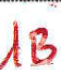

In [ ]:
image = Image.open(train_dataset.root_dir + train_df['file name'][1]).convert('RGB')
image

In [ ]:
labels = encoding['labels']
labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print(label_str)

1B


In [ ]:
from transformers import VisionEncoderDecoderModel
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

VisionEncoderDecoderModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: [

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# print total parameter

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_params:,}")

Total Parameters: 558,226,432


# print trainable parameter

In [ ]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Trainable Parameters: {trainable_params:,}")

Trainable Parameters: 558,226,432


In [ ]:
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.vocab_size = model.config.decoder.vocab_size

model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 64
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2
model.config.num_beams = 5



In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate = True,
    evaluation_strategy = "steps",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    fp16=False,
    output_dir="./",
    logging_steps=2,
    save_steps=1000,
    eval_steps=200,
    report_to="wandb",
    # num_train_epochs=3,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.2 MB/s eta 0:00:00


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.6 MB/s eta 0:00:00


In [ ]:
import evaluate

cer_metric = evaluate.load("cer")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

In [ ]:
for i in range(3):
    item = train_dataset[i]
    print(f"Item {i}:")
    print(item)
    print("Keys:", list(item.keys()))
    print("-" * 40)

Item 0:
{'pixel_values': tensor([[[0.8588, 0.8588, 0.8588,  ..., 0.8667, 0.8667, 0.8667],
         [0.8588, 0.8588, 0.8588,  ..., 0.8667, 0.8667, 0.8667],
         [0.8588, 0.8588, 0.8588,  ..., 0.8667, 0.8667, 0.8667],
         ...,
         [0.9451, 0.9451, 0.9451,  ..., 0.8980, 0.8980, 0.8980],
         [0.9451, 0.9451, 0.9451,  ..., 0.8980, 0.8980, 0.8980],
         [0.9451, 0.9451, 0.9451,  ..., 0.8980, 0.8980, 0.8980]],

        [[0.8588, 0.8588, 0.8588,  ..., 0.8824, 0.8824, 0.8824],
         [0.8588, 0.8588, 0.8588,  ..., 0.8824, 0.8824, 0.8824],
         [0.8588, 0.8588, 0.8588,  ..., 0.8824, 0.8824, 0.8824],
         ...,
         [0.9451, 0.9451, 0.9451,  ..., 0.8824, 0.8824, 0.8824],
         [0.9451, 0.9451, 0.9451,  ..., 0.8824, 0.8824, 0.8824],
         [0.9451, 0.9451, 0.9451,  ..., 0.8824, 0.8824, 0.8824]],

        [[0.8588, 0.8588, 0.8588,  ..., 0.9059, 0.9059, 0.9059],
         [0.8588, 0.8588, 0.8588,  ..., 0.9059, 0.9059, 0.9059],
         [0.8588, 0.8588, 0.8588,

In [ ]:
from transformers import DefaultDataCollator

class CustomDataCollator(DefaultDataCollator):
    def __call__(self, features):
        for feature in features:
            if "num_items_in_batch" in feature:
                print("Found num_items_in_batch in a feature, value:", feature["num_items_in_batch"])
        cleaned_features = [
            {k: v for k, v in feature.items() if k != "num_items_in_batch"}
            for feature in features
        ]
        batch = super().__call__(cleaned_features)
        return batch


data_collator = CustomDataCollator()


In [ ]:
# from transformers import default_data_collator
import wandb
wandb.init(project="TrOCR")
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=data_collator,
    # report_to="wandb",
)
trainer.train()

# Inference

# load model

In [ ]:
trainer.save_model("./saved_model")  
processor.save_pretrained("./saved_model")  

In [ ]:
from transformers import VisionEncoderDecoderModel, AutoProcessor
from PIL import Image
import torch

model = VisionEncoderDecoderModel.from_pretrained("./saved_model")

processor = AutoProcessor.from_pretrained("./saved_model")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


In [ ]:
# Load an image
image_path = "rubber-stamp-with-word-sample-inside-vector-illustration-FM1EGJ.jpg"  
image = Image.open(image_path).convert("RGB")  

inputs = processor(images=image, return_tensors="pt").to(device)

with torch.no_grad():
    output_ids = model.generate(**inputs)

predicted_text = processor.batch_decode(output_ids, skip_special_tokens=True)[0]
print("Recognized Text:", predicted_text)
